# Bank Customer Churn Prediction

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 20.December.2024\
`Dataset:` [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction)

### About Dataset (Meta data)
#### Context
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer.

### Content
#### Column Descriptions:
* `Customer ID:` A unique identifier for each customer.
* `Surname:` The customer's surname or last name.
* `Credit Score:` A numerical value representing the customer's credit score.
* `Geography:` The country where the customer resides (France, Spain or Germany).
* `Gender:` The customer's gender (Male or Female).
* `Age:`  The customer's age.
* `Tenure:` The number of years the customer has been with the bank.
* `Balance:` The customer's account balance.
* `NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card).
* `MonthsHasCrCard:` Whether the customer has a credit card (1 = yes, 0 = no).
* `IsActiveMember:` Whether the customer is an active member (1 = yes, 0 = no).
* `EstimatedSalary:`  The estimated salary of the customer.
* `Exited:` Whether the customer has churned (1 = yes, 0 = no).

# `Import Libraries`

In [184]:
# Import libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# `Load the Dataset`

In [185]:
df = pd.read_csv('Data/Customer.csv')
# Show top 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


# `Data Preprocessing`

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


`There are some categorical columns too in the dataset`
* `Categorical Columns:` Surname, Geography, Gender

In [187]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [188]:
#Checking the data shape
df.shape

(10002, 14)

In [189]:
# Check for missing values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

`There are some missing values in the columns: Geography, Age, HasCrCard, IsActiveMember`


As there are only one-one missing values in each columns so we dropping it

In [190]:
df.dropna(inplace=True)

In [191]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [192]:
df.shape

(9998, 14)

In [193]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

`Now there are no missing values in the dataset`

In [194]:
# Check NaN values in the entire dataset
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


`There are no nan values too`

In [195]:
# Check unique values in categorical columns
print("Surname:", df['Surname'].unique())
print("Geography:", df['Geography'].unique())
print("Gender:", df['Gender'].unique())


Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [196]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [197]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

`There was no use of these columns for churn prediction so we have dropped it`

In [198]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


# `Exploratory Data Analysis (EDA)`

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


# `Analysis of Geography Column`

In [200]:
# Find the values of Geography column
df['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

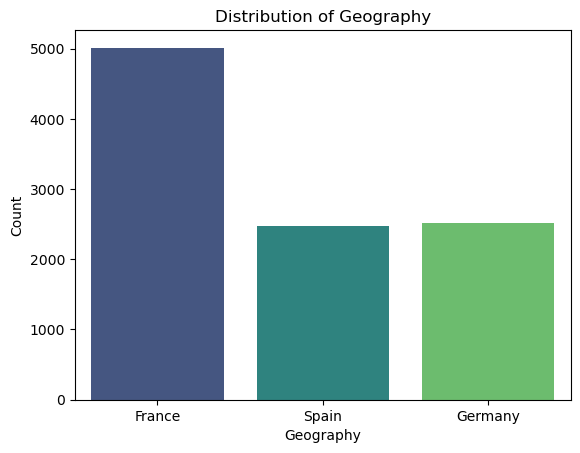

In [201]:
sns.countplot(x='Geography', data=df, palette='viridis')
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

`Most of the customers are from France followed by Spain and Germany`

# `Exploring Gender Column`

In [202]:
# Find the values of Geography column
df['Gender'].value_counts()

Gender
Male      5455
Female    4543
Name: count, dtype: int64

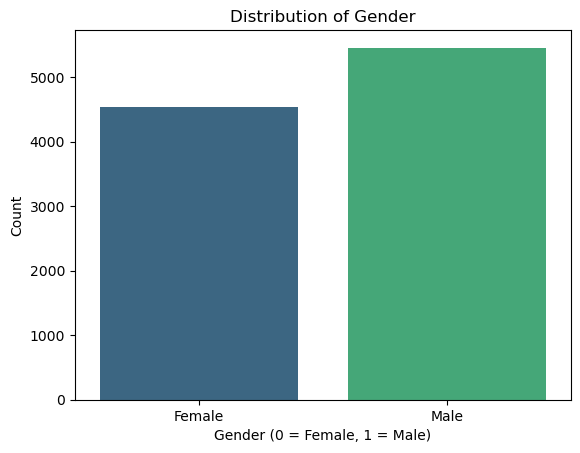

In [203]:
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

`Most of the customers are male`

In [204]:
# calculating the percentage fo male and female value counts in the data

male_count = 5455
female_count = 4543

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data: {female_percentages:.2f}%')

Male percentage in the data: 54.56%
Female percentage in the data: 45.44%


`Males are more than 50% in the dataset`

# `Exploring Age Column`

In [205]:
print('Age Summary Statistics:')
df['Age'].describe()

Age Summary Statistics:


count    9998.000000
mean       38.920287
std        10.487986
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [206]:
df['Age'].min(), df['Age'].max()

(18.0, 92.0)

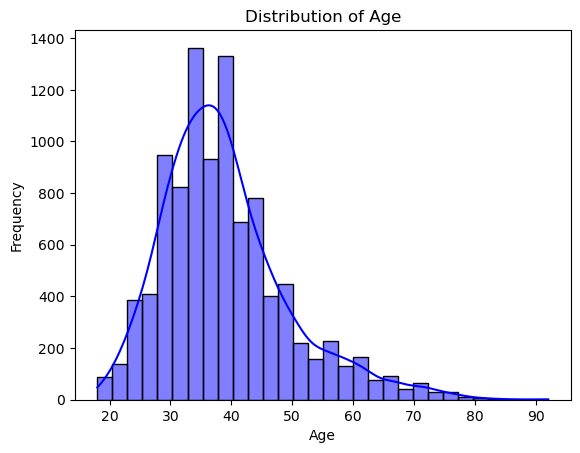

In [207]:
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Mean 38.920287057411485
Median 37.0
Mode 0    37.0
Name: Age, dtype: float64


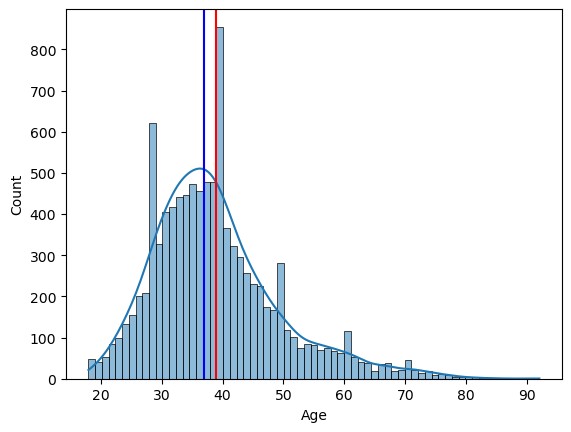

In [208]:
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'orange')
plt.axvline(df['Age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['Age'].mean())
print('Median', df['Age'].median())
print('Mode', df['Age'].mode())

# `Analysis of IsActiveMember Column`

In [209]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5147
0.0    4851
Name: count, dtype: int64

`Most of the users in the dataset are active`

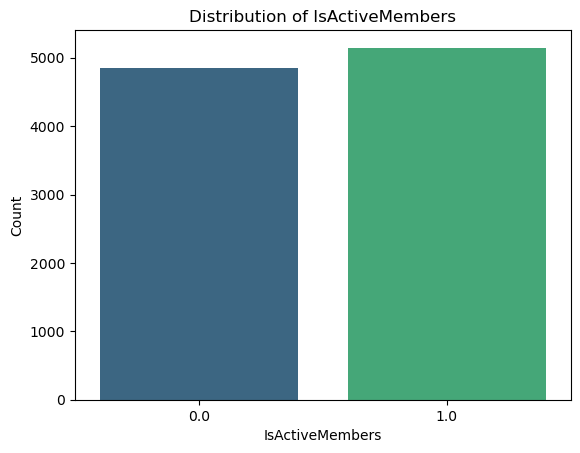

In [210]:
sns.countplot(x='IsActiveMember', data=df, palette='viridis')
plt.title('Distribution of IsActiveMembers')
plt.xlabel('IsActiveMembers')
plt.ylabel('Count')
plt.show()

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


# `Identifying and Handling Outliers`

Column: CreditScore
Number of outliers: 15


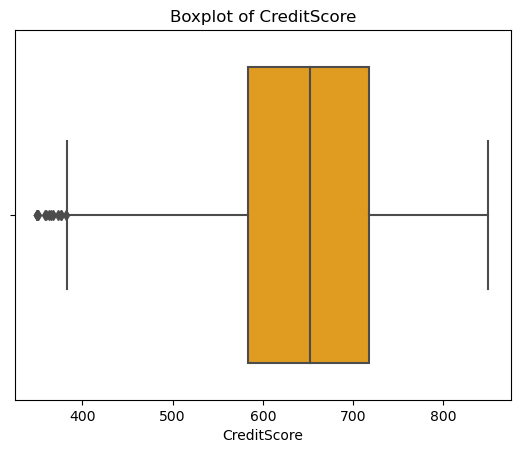

After handling outliers, dataset shape: (9983, 11)
Column: Age
Number of outliers: 359


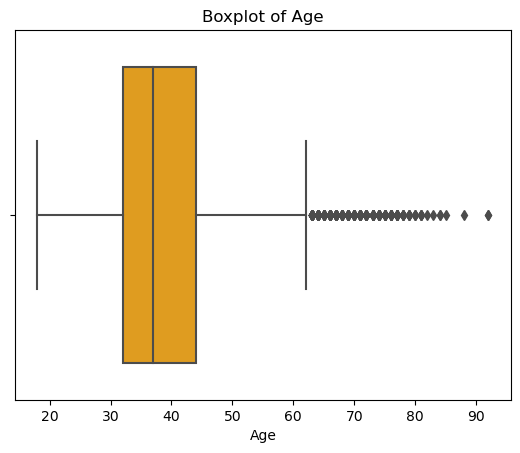

After handling outliers, dataset shape: (9624, 11)
Column: Tenure
Number of outliers: 0


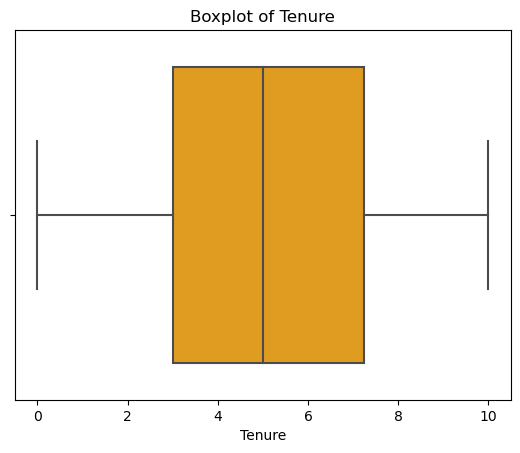

After handling outliers, dataset shape: (9624, 11)
Column: Balance
Number of outliers: 0


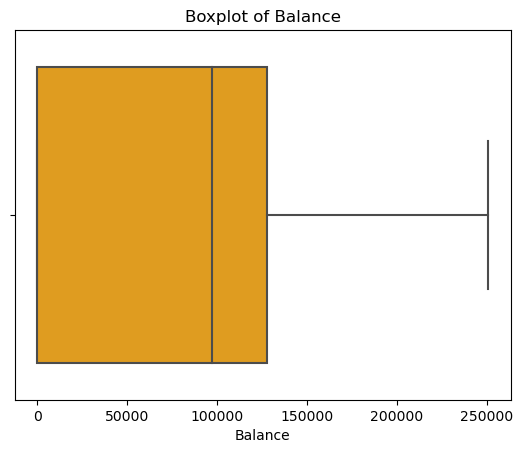

After handling outliers, dataset shape: (9624, 11)
Column: NumOfProducts
Number of outliers: 58


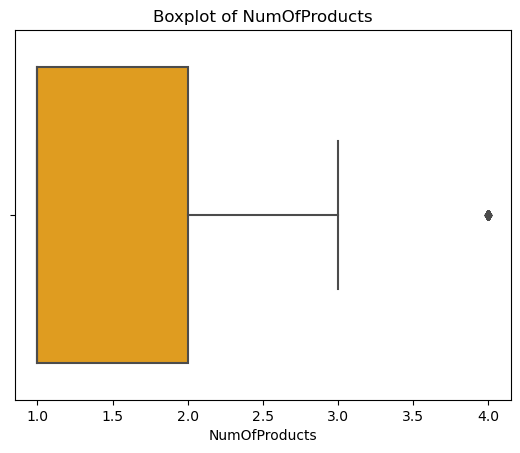

After handling outliers, dataset shape: (9566, 11)
Column: HasCrCard
Number of outliers: 0


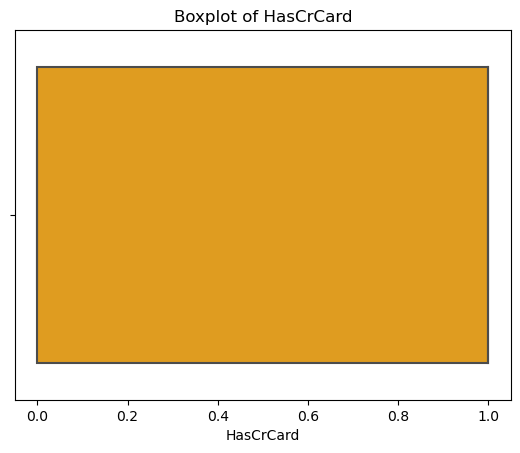

After handling outliers, dataset shape: (9566, 11)
Column: IsActiveMember
Number of outliers: 0


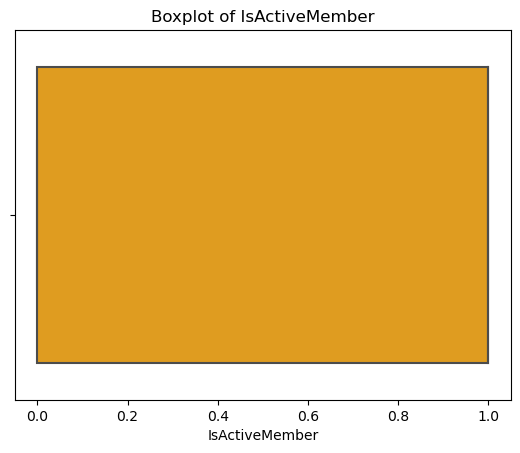

After handling outliers, dataset shape: (9566, 11)
Column: EstimatedSalary
Number of outliers: 0


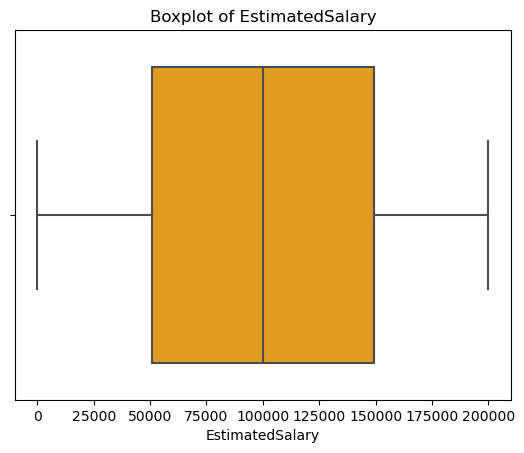

After handling outliers, dataset shape: (9566, 11)


In [212]:
# List of numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    
    # Visualization
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    
    # Handle outliers: Remove rows with outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"After handling outliers, dataset shape: {df.shape}")


`All outliers in the numerical columns have been successfully identified and handled.`

In [213]:
df.shape

(9566, 11)

In [214]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
10,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0
14,635,Spain,Female,35.0,7,0.00,2,1.0,1.0,65951.65,0


##### `Analysis of plotting`

> * Everything seems fine and there are no outliers in the columns.
> * Columns are cleaned from outliers and also there are no missing values in the dataset.
> * The next step is Feature Selection but before that we need to encode the categorical columns.

In [215]:
# label Encoding

from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Geography', 'Gender']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [216]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
10,528,0,1,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,497,2,1,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,476,0,0,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,549,0,0,25.0,5,0.00,2,0.0,0.0,190857.79,0
14,635,2,0,35.0,7,0.00,2,1.0,1.0,65951.65,0


`Now everything is good to go for feature selections`

# `Feature Selection`

In [217]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('Exited', axis=1) 
y = df['Exited']              

# Apply SelectKBest with Chi-Square Test
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)

# Get top 5 feature names
selected_features = X.columns[fit.get_support()]
print("Top 5 Features Selected:", selected_features)

# Feature Scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Scores:\n", feature_scores)

Top 5 Features Selected: Index(['Gender', 'Age', 'Balance', 'IsActiveMember', 'EstimatedSalary'], dtype='object')

Feature Scores:
            Feature         Score
5          Balance  6.456268e+06
9  EstimatedSalary  2.268202e+04
3              Age  2.449916e+03
8   IsActiveMember  9.994814e+01
2           Gender  4.682741e+01
0      CreditScore  4.073225e+01
6    NumOfProducts  2.264400e+01
1        Geography  1.159640e+01
4           Tenure  3.257325e+00
7        HasCrCard  1.640134e-01


In [218]:
# Filter dataset with selected features
selected_features = X[selected_features]

# `Machine Learning Model and Evaluation`

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [220]:
#Split Dataset
X = selected_features
y= df[['Exited']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)
y_train = y_train.values.ravel()  # Converts y_train to a 1D array
y_test = y_test.values.ravel()    # Converts y_test to a 1D array 

In [221]:
# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))
print(classification_report(y_test, logistic_preds))


Logistic Regression Accuracy: 0.8236933797909408
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2351
           1       0.53      0.23      0.32       519

    accuracy                           0.82      2870
   macro avg       0.69      0.59      0.61      2870
weighted avg       0.79      0.82      0.79      2870



In [222]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.8205574912891986
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2351
           1       0.51      0.31      0.38       519

    accuracy                           0.82      2870
   macro avg       0.68      0.62      0.64      2870
weighted avg       0.80      0.82      0.80      2870



In [223]:
# Initialize and train the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.8247386759581882
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2351
           1       0.53      0.27      0.36       519

    accuracy                           0.82      2870
   macro avg       0.69      0.61      0.63      2870
weighted avg       0.80      0.82      0.80      2870



`Maximum Accuracy we got from Logistic Regression i.e 82% so we taking that model for further consideration`

# `Saving the Logistic Regression model for future prediction`

In [224]:
# Saving the model
import joblib

# Save the trained model
joblib.dump(logistic_model, 'model.pkl')

# Load the model back
loaded_model = joblib.load('model.pkl')

In [226]:
import pickle

filename = 'model.pkl'

with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Check the type of the object
print(type(loaded_model))


<class 'numpy.ndarray'>
